In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib qt

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())




'2019-09-13 17:31:39.118768'

In [2]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']

In [3]:
eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73', 'ER36', 'ER32', 'ER43','ER31']
western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']

In [4]:
def basin(x):
    if x in western_basin:
       return 'Western Basin'
    if x in central_basin:
       return 'Central Basin'
    if x in eastern_basin:
       return 'Eastern Basin'
    else:
       return 'Unknown'

In [6]:
years = range(1995,2018)
seasons = ['Spring', 'Summer']
# Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
# Cl = Cl[Cl.QC_TYPE=='routine field sample']
# Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
# Cl = Cl[Cl['SEASON'].isin(seasons)]
# Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
# Cl['BASIN'] =Cl['STATION_ID'].map(basin)
# Cl = Cl[Cl['VALUE_1']>8]
# Cl = Cl.drop(Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')].index)

In [4]:
# Clr = Cl.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()

In [7]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']
Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
Cl = Cl[Cl['SEASON'].isin(seasons)]
Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
Cl['BASIN'] =Cl['STATION_ID'].map(basin)


In [8]:
Cl.ANALYTE_1.values[0]+', ' + Cl.UNITS_1.values[0].strip()

'Chloride, mg/l'

In [10]:
names = ['Alk', 'Chla', 'Cl', 'Conductivity', 'Hardness', 'NH3N', 'Ntot_oxidized', 'orthoP', 'Oxygen', 'pH', 'Ratios', 'SilicaDissAsSi', 'SiTotal', 'Temp', 'TOTP', 'Turbidity']


In [12]:
names = ['Alk', 'Chla', 'Cl', 'Conductivity', 'Hardness', 'NH3N', 'Ntot_oxidized', 'orthoP', 'Oxygen', 'pH', 'Ratios', 'SilicaDissAsSi', 'SiTotal', 'Temp', 'TOTP', 'Turbidity']


In [143]:
from scipy import stats

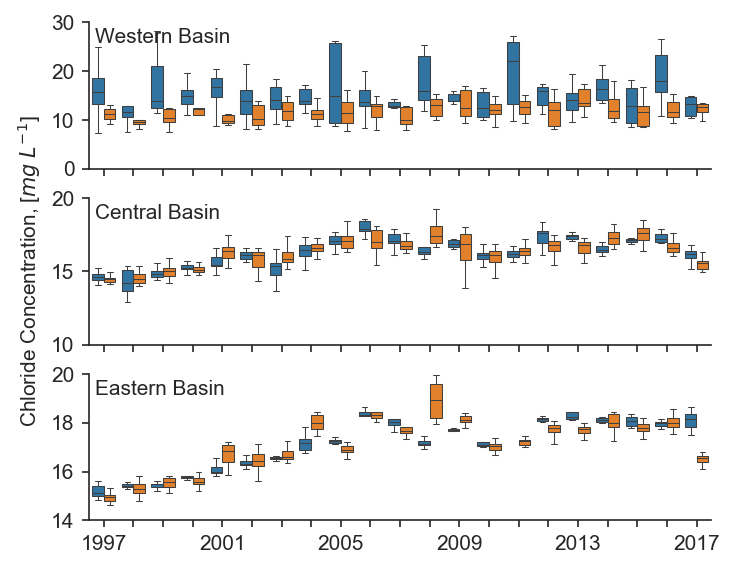

In [146]:
names = ['Cl']
for name in names:
    Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    Cl = Cl[Cl.QC_TYPE=='routine field sample']
    Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    Cl = Cl[Cl['SEASON'].isin(seasons)]
    Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
    Cl['BASIN'] =Cl['STATION_ID'].map(basin)
    
    Cl = Cl.dropna(subset=['VALUE_1'])
    
    
    f, axes = plt.subplots(3,1, figsize=(5,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = Cl[(Cl['STATION_ID'].isin(b))]
            data = data[(np.abs(stats.zscore(data['VALUE_1'])) < 3)]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             clr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             clr=sns.color_palette().as_hex()[2]
            ax = sns.boxplot(x='YEAR', y='VALUE_1', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
#             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
            ax.legend_.remove()
#             ax.set_label(s)
            axes[i].set_xlim(11.5,32.5)
            axes[i].set_ylim(auto=True)
#             axes[i].grid(lw=0.2)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
    #         axes[i].legend(False)
            axes[i].text(0.01,0.86, data.BASIN.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
    axes[1].set_ylabel('Chloride Concentration, [$mg$ $L^{-1}$]')
    axes[0].set_ylim(0,30)
    axes[1].set_ylim(10,20)
    axes[2].set_ylim(14,20)
#     axes[0].legend(loc=(1.05,0.5))
    for ind, label in enumerate(ax.get_xticklabels()):
        if (ind ) % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.subplots_adjust(left=0.12, right=0.95, bottom=0.12, top=0.95)
    sns.despine()
    f.savefig('Mass Balance/GLENDA/All Stations/GLENDA Trends/Trends_'+Cl.ANALYTE_1.values[0]+'_' + Cl.UNITS_1.values[0].replace('/', '')+'.pdf')

In [105]:
import numpy as np

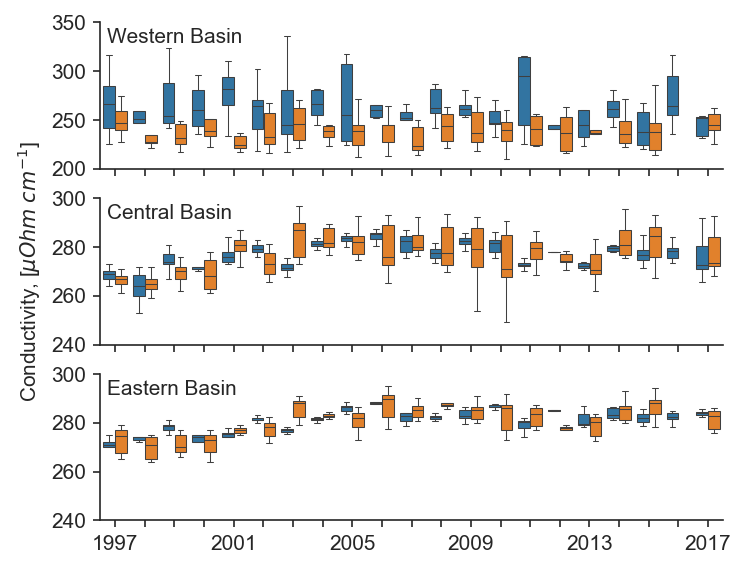

In [153]:
names = ['Conductivity']
for name in names:
    Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    Cl = Cl[Cl.QC_TYPE=='routine field sample']
    Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    Cl = Cl[Cl['SEASON'].isin(seasons)]
    Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
    Cl['BASIN'] =Cl['STATION_ID'].map(basin)
    
    Cl = Cl.dropna(subset=['VALUE_1'])
    
    
    f, axes = plt.subplots(3,1, figsize=(5,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = Cl[(Cl['STATION_ID'].isin(b))]
            data = data[(np.abs(stats.zscore(data['VALUE_1'])) < 3)]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             clr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             clr=sns.color_palette().as_hex()[2]
            ax = sns.boxplot(x='YEAR', y='VALUE_1', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
#             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
            ax.legend_.remove()
#             ax.set_label(s)
            axes[i].set_xlim(11.5,32.5)
            axes[i].set_ylim(auto=True)
#             axes[i].grid(lw=0.2)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
    #         axes[i].legend(False)
            axes[i].text(0.01,0.86, data.BASIN.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
    axes[1].set_ylabel('Conductivity, [$\mu Ohm$ $cm^{-1}$]')
    axes[0].set_ylim(200,350)
    axes[1].set_ylim(240,300)
    axes[2].set_ylim(240,300)
#     axes[0].legend(loc=(1.05,0.5))
#     ax.set_xticklabels(np.linspace(0,32, 33)[3::4], [1996,2000,2004, 2008, 2012, 2016], rotation=0)
#     ax.set_xticks(np.linspace(10,32,23), [1996,2000,2004, 2008, 2012, 2016])
    for ind, label in enumerate(ax.get_xticklabels()):
        if (ind ) % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.subplots_adjust(left=0.12, right=0.95, bottom=0.12, top=0.95)
    sns.despine()
    f.savefig('Mass Balance/GLENDA/All Stations/GLENDA Trends/Trends_'+Cl.ANALYTE_1.values[0]+'_' + Cl.UNITS_1.values[0].replace('/', '')+'.pdf')

In [120]:
list(ax.get_xticklabels())[3::4]

[Text(3, 0, '1986'),
 Text(7, 0, '1990'),
 Text(11, 0, '1996'),
 Text(15, 0, '2000'),
 Text(19, 0, '2004'),
 Text(23, 0, '2008'),
 Text(27, 0, '2012'),
 Text(31, 0, '2016')]

np.linspace(0,32)

In [119]:
list(ax.get_xticklabels())

[Text(0, 0, '1983'),
 Text(1, 0, '1984'),
 Text(2, 0, '1985'),
 Text(3, 0, '1986'),
 Text(4, 0, '1987'),
 Text(5, 0, '1988'),
 Text(6, 0, '1989'),
 Text(7, 0, '1990'),
 Text(8, 0, '1991'),
 Text(9, 0, '1992'),
 Text(10, 0, '1993'),
 Text(11, 0, '1996'),
 Text(12, 0, '1997'),
 Text(13, 0, '1998'),
 Text(14, 0, '1999'),
 Text(15, 0, '2000'),
 Text(16, 0, '2001'),
 Text(17, 0, '2002'),
 Text(18, 0, '2003'),
 Text(19, 0, '2004'),
 Text(20, 0, '2005'),
 Text(21, 0, '2006'),
 Text(22, 0, '2007'),
 Text(23, 0, '2008'),
 Text(24, 0, '2009'),
 Text(25, 0, '2010'),
 Text(26, 0, '2011'),
 Text(27, 0, '2012'),
 Text(28, 0, '2013'),
 Text(29, 0, '2014'),
 Text(30, 0, '2015'),
 Text(31, 0, '2016'),
 Text(32, 0, '2017')]

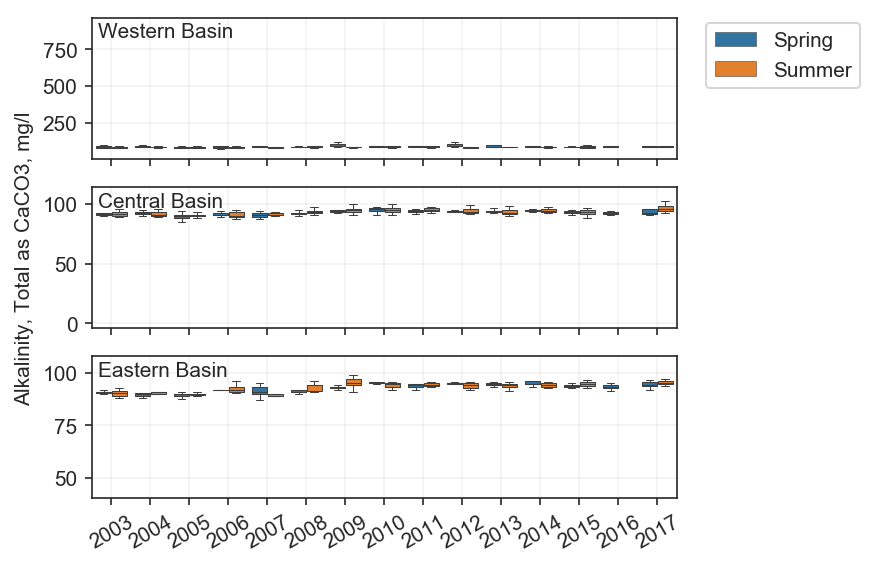

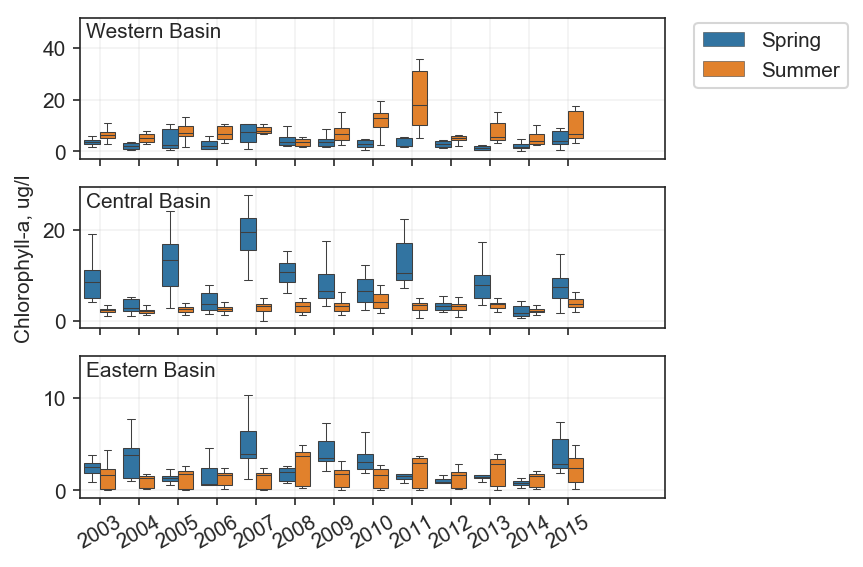

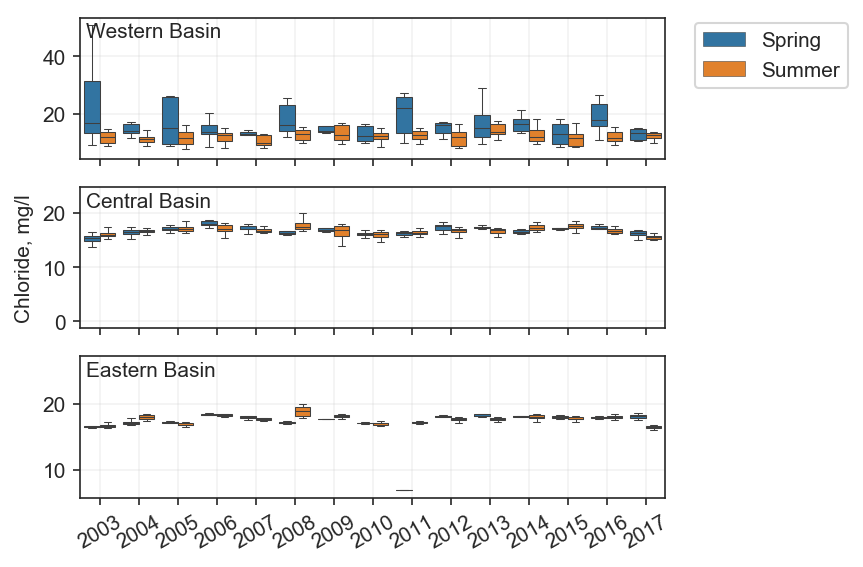

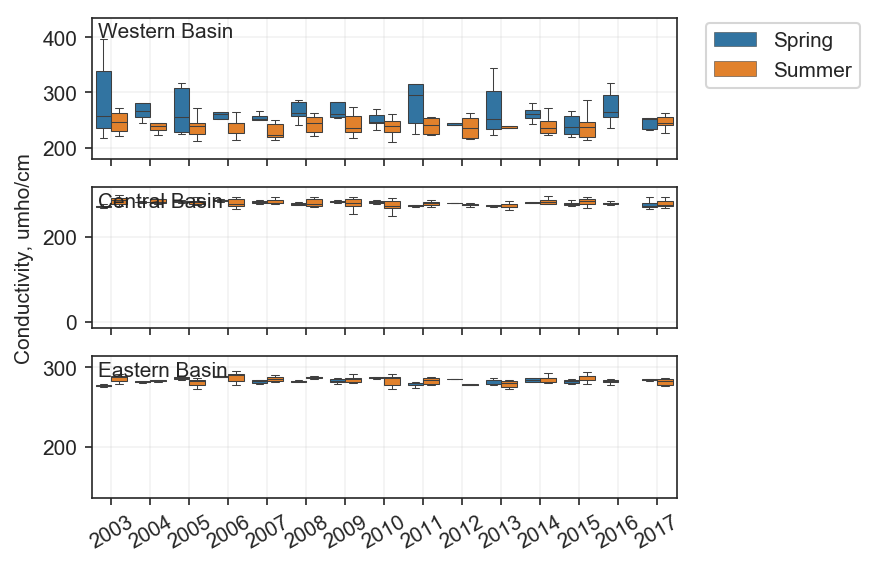

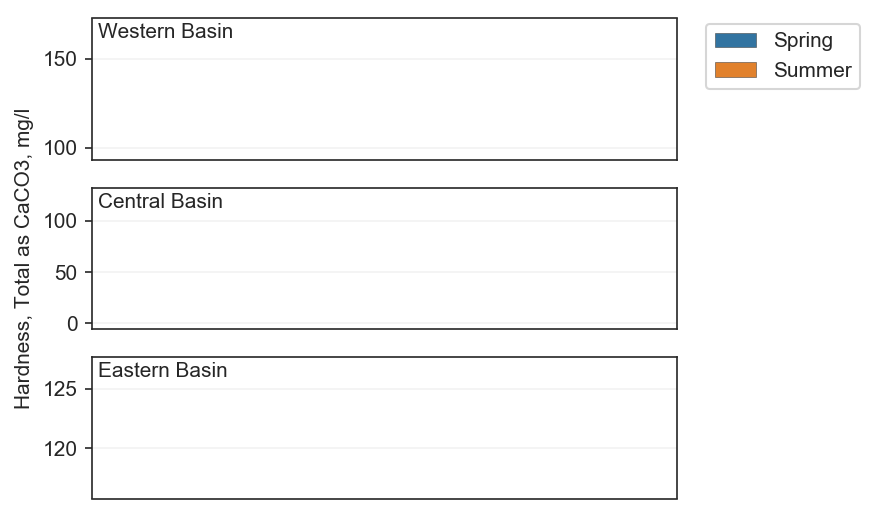

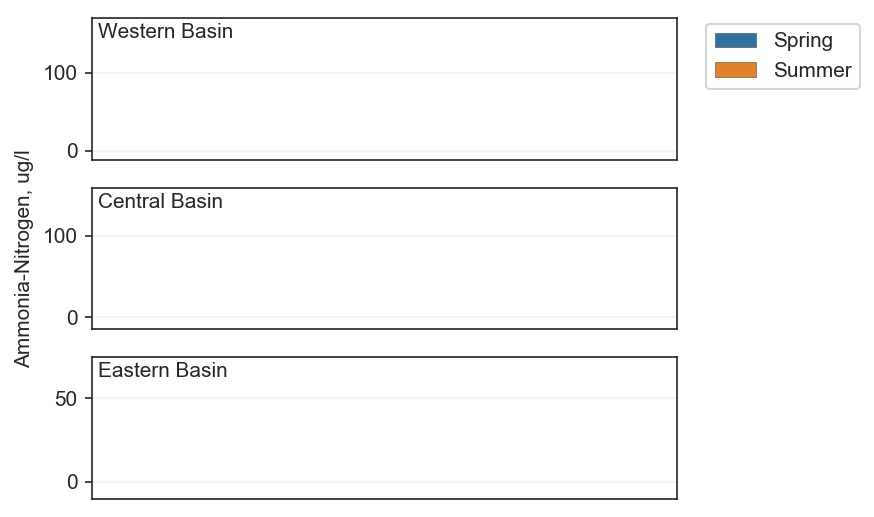

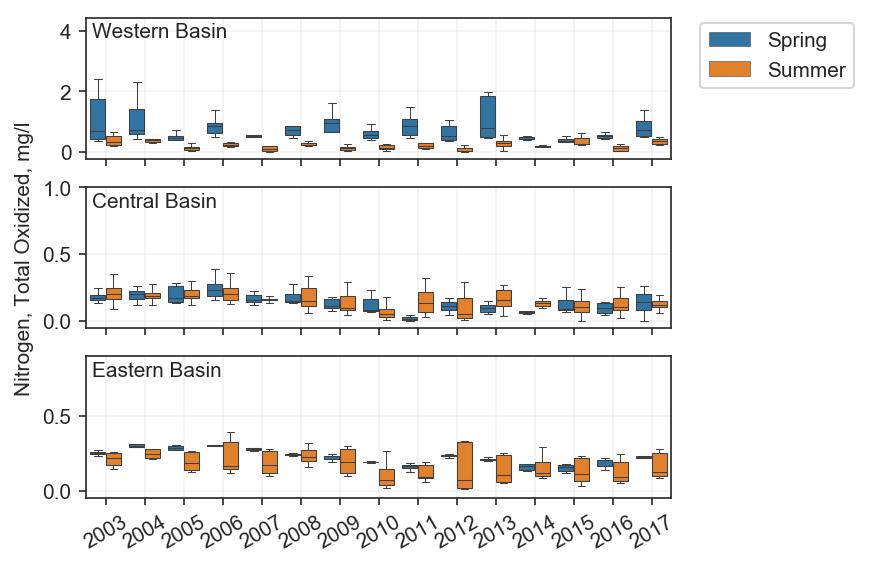

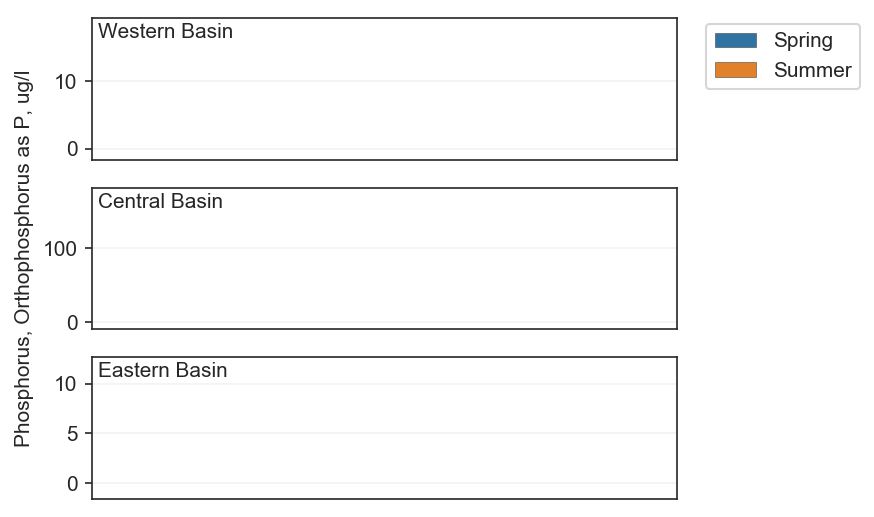

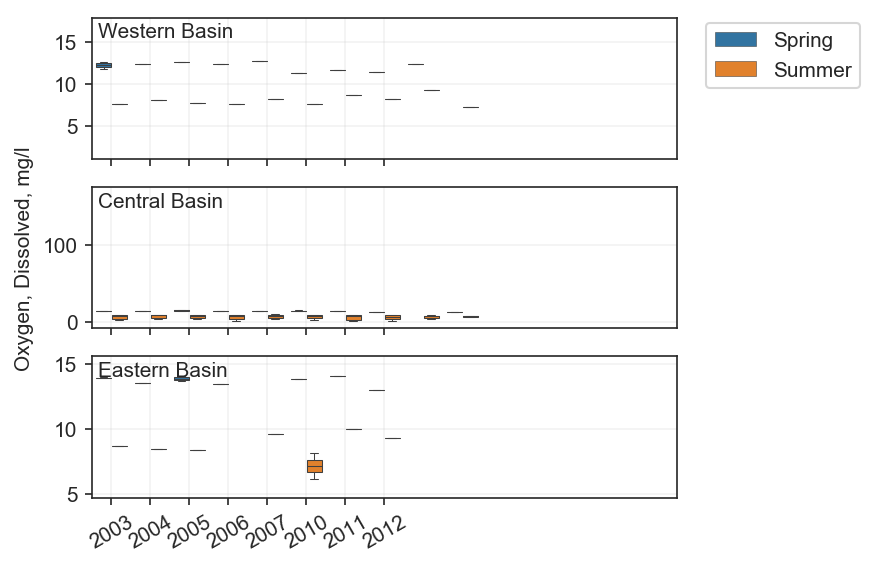

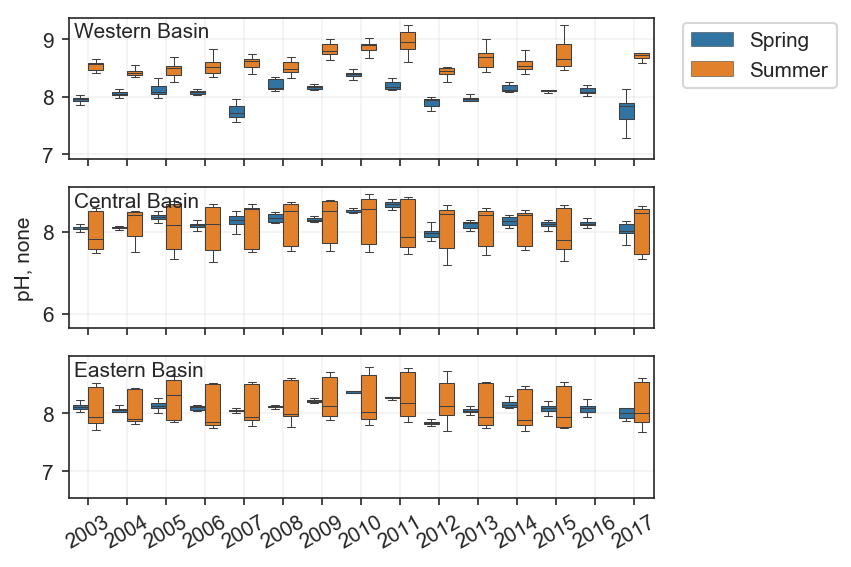

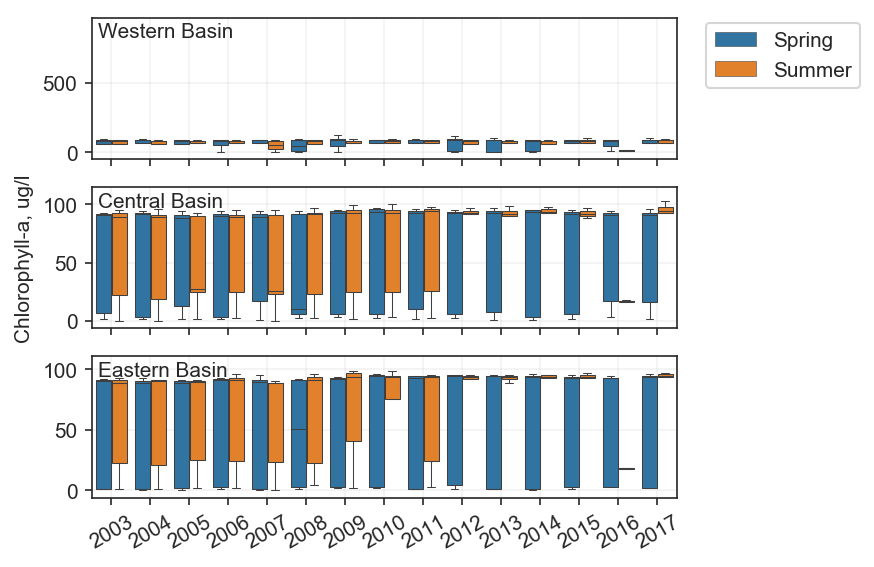

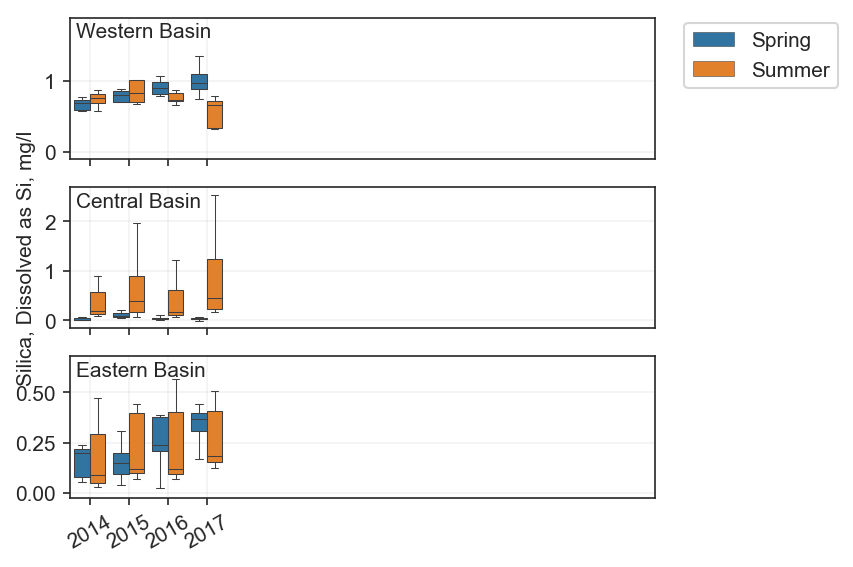

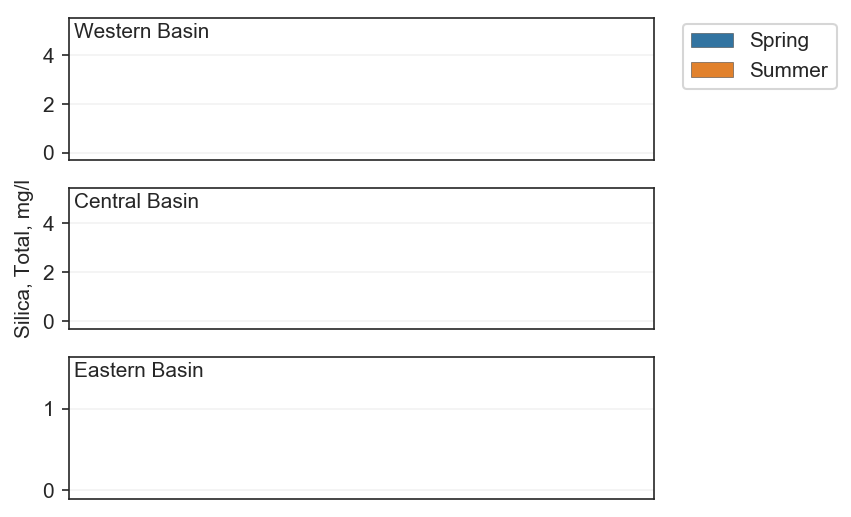

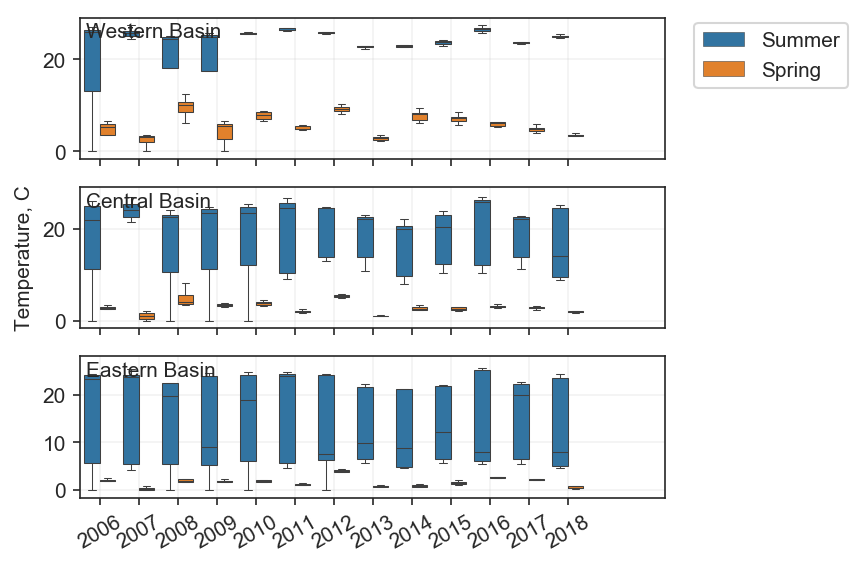

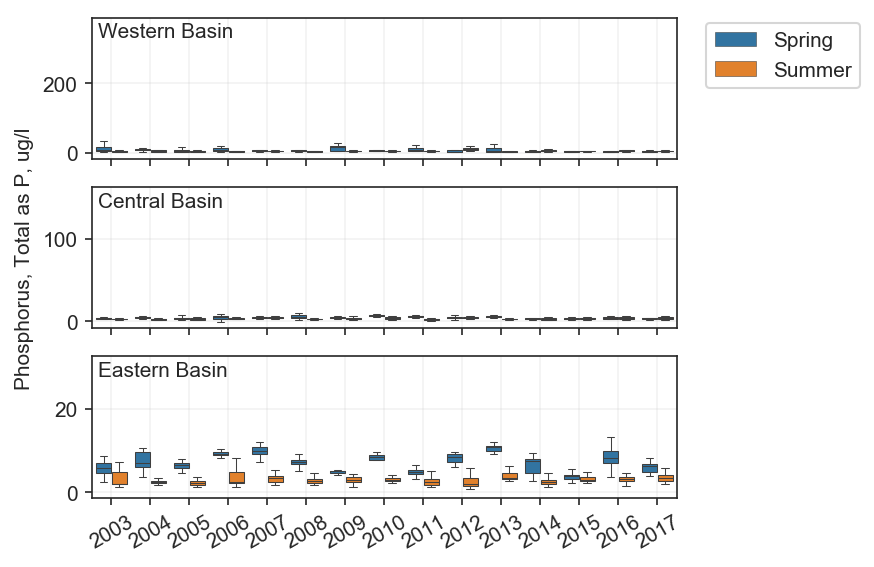

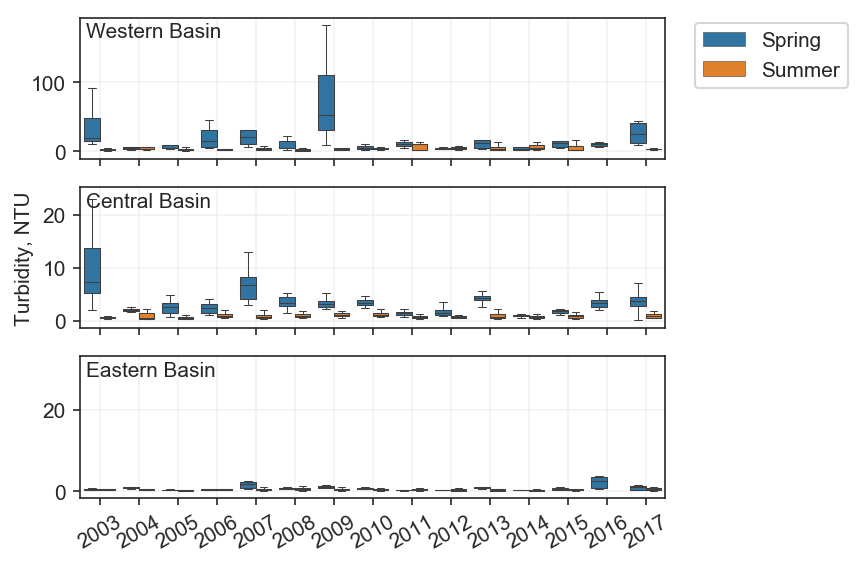

In [84]:
for name in names:
    Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    Cl = Cl[Cl.QC_TYPE=='routine field sample']
    Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    Cl = Cl[Cl['SEASON'].isin(seasons)]
    Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
    Cl['BASIN'] =Cl['STATION_ID'].map(basin)
    f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = Cl[(Cl['STATION_ID'].isin(b))]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             clr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             clr=sns.color_palette().as_hex()[2]
            ax = sns.boxplot(x='YEAR', y='VALUE_1', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
#             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
            ax.legend_.remove()
            ax.set_label(s)
            axes[i].set_xlim(17.5,32.5)
            axes[i].set_ylim(auto=True)
            axes[i].grid(lw=0.2)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
    #         axes[i].legend(False)
            axes[i].text(0.01,0.86, data.BASIN.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
    axes[1].set_ylabel(Cl.ANALYTE_1.values[0]+', ' + Cl.UNITS_1.values[0])
    # axes[0].set_ylim(0,30)
    # axes[1].set_ylim(13,21)
    # axes[2].set_ylim(15,21)
    axes[0].legend(loc=(1.05,0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.subplots_adjust(left=0.1, right=0.75, bottom=0.1, top=0.9)
#     f.savefig('Mass Balance/GLENDA/All Stations/GLENDA Trends/'+Cl.ANALYTE_1.values[0]+'_' + Cl.UNITS_1.values[0].replace('/', '')+'.pdf')


Text(0,0.5,'Chloride, [$mg$ $L^{-1}$]')

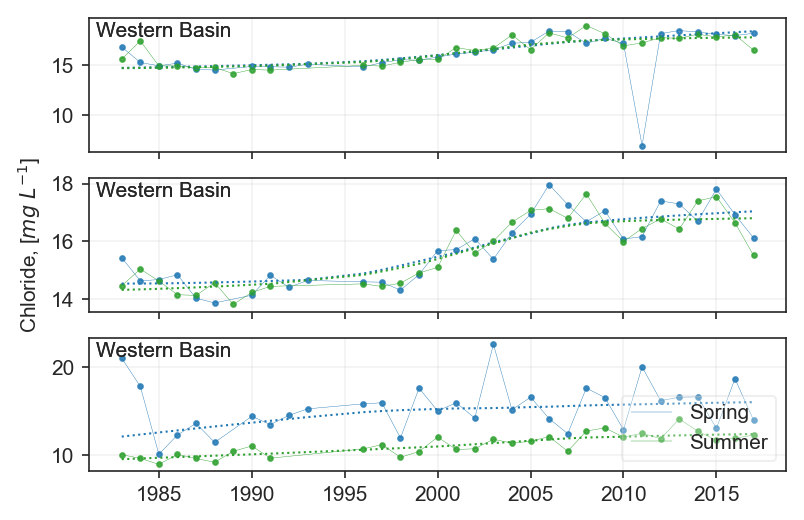

In [13]:
# %matplotlib qt
# %matplotlib inline
# %matplotlib osx
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
a = []
for i, b in enumerate([eastern_basin, central_basin, western_basin]):
    for k, s in enumerate(seasons):
        data = Cl[(Cl['STATION_ID'].isin(b)) & (Cl['SEASON']==s)]
#         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.boxplot(x='YEAR', y='VALUE_1', data=data,hue='SEASON' lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
#         axes[i].set_xlim(1990,2017)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, Cl.BASIN.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Chloride, [$mg$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Chloride_mgL.pdf')

Text(0,0.5,'Chloride, [$mg$ $L^{-1}$]')

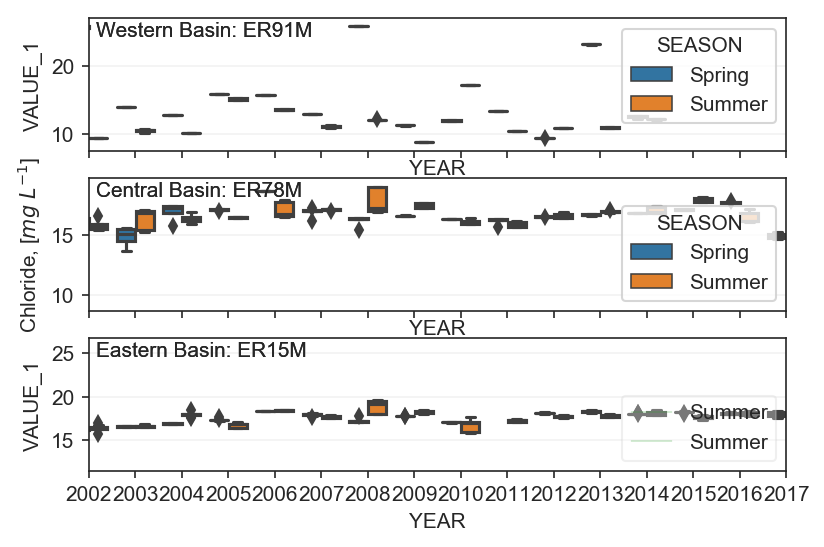

In [6]:
# %matplotlib qt
# %matplotlib inline
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Clr[(Clr['STATION_ID']==st) & (Clr['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
#         ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
    data = Cl[(Cl['STATION_ID']==st)]
    sns.boxplot(x='YEAR', y='VALUE_1', hue='SEASON', data=data, ax=axes[i])
axes[2].set_xlim(17,32)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Chloride, [$mg$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Chloride_mgL.pdf')


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (37,38,44,45,47,48,50,51,54,55,57,58,61,62,64,65,68,69,71,72,75,76,78,79,82,83,85,86,89,90,92,93,96,97,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0,0.5,'Temperature, [$^\\circ C$]')

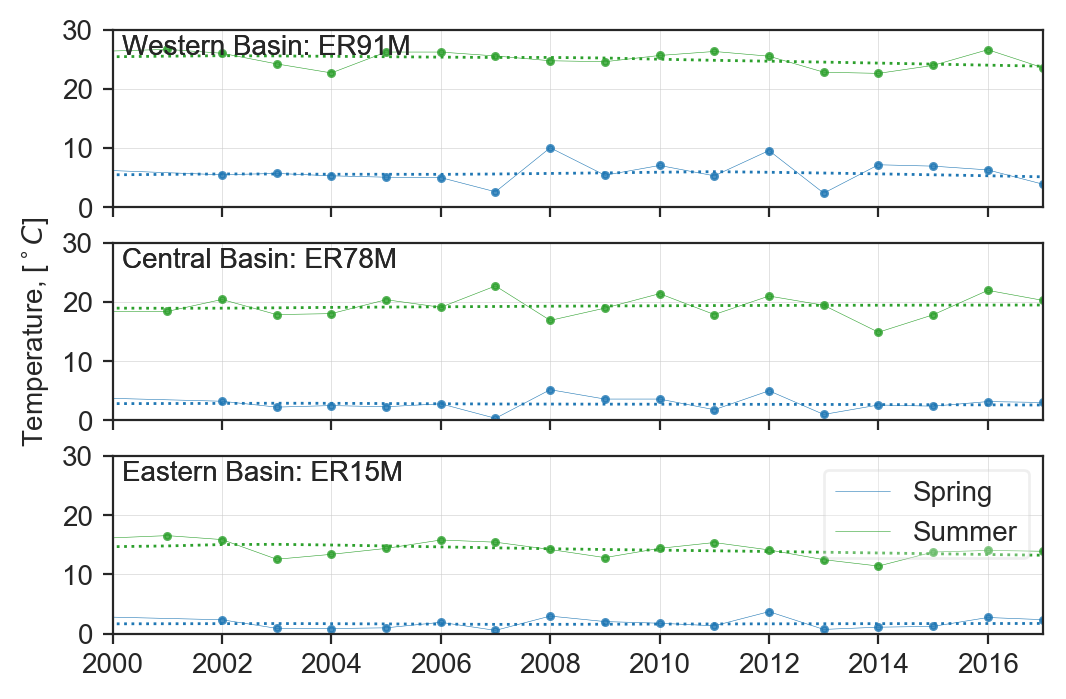

In [7]:
Temp = pd.read_csv('../../measurements/GLNPO/Mass Balance/Temp.csv')
Temp = Temp[Temp.QC_TYPE=='routine field sample']
Temp = Temp[Temp['STATION_ID'].isin(deep_stations)]
Temp = Temp[Temp['STATION_ID'].isin(deep_stations)]
Temp = Temp[Temp['SEASON'].isin(seasons)]
Temp['VALUE_1'] = pd.to_numeric(Temp['VALUE_1'], errors='coerce')
Temp = Temp[Temp['VALUE_1']>0.1]
Temp = Temp.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Temp[(Temp['STATION_ID']==st) & (Temp['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
        axes[i].set_ylim(0,30)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Temperature, [$^\circ C$]')
# f.savefig('Mass Balance/GLENDA/Trends_Temperature_C.pdf')

Text(0,0.5,'Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]')

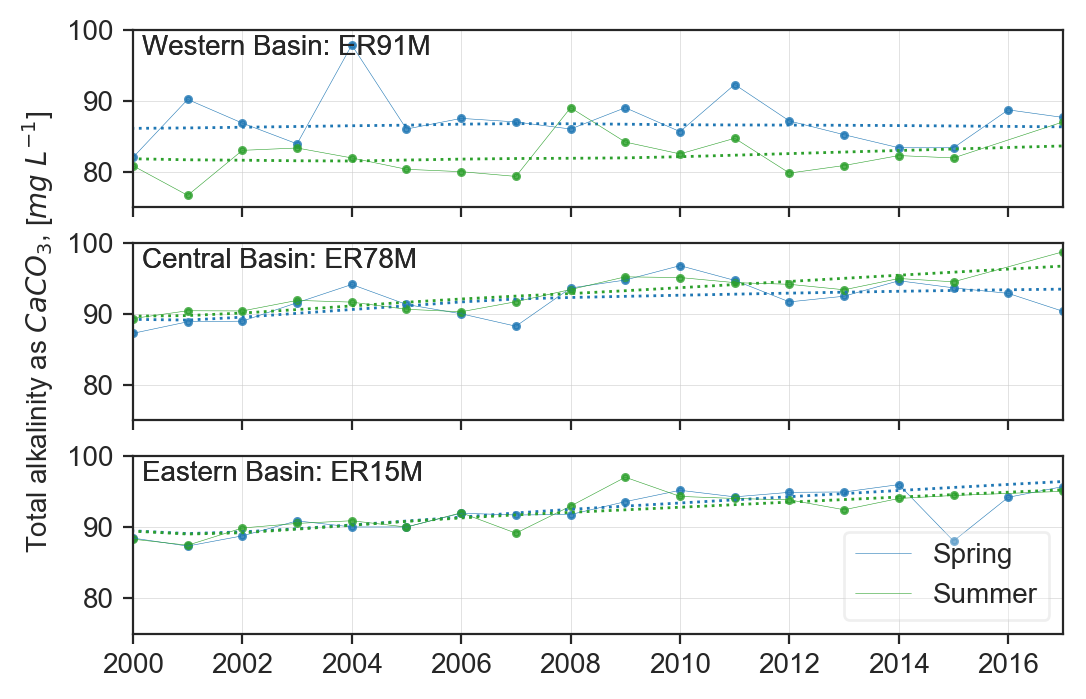

In [8]:
Alk = pd.read_csv('../../measurements/GLNPO/Mass Balance/Alk.csv')
Alk = Alk[Alk.QC_TYPE=='routine field sample']
Alk = Alk[Alk['STATION_ID'].isin(deep_stations)]
Alk = Alk[Alk['STATION_ID'].isin(deep_stations)]
Alk = Alk[Alk['SEASON'].isin(seasons)]
Alk['VALUE_1'] = pd.to_numeric(Alk['VALUE_1'], errors='coerce')
Alk = Alk[Alk['VALUE_1']>0.1]
Alk = Alk.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Alk[(Alk['STATION_ID']==st) & (Alk['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
        axes[i].set_ylim(75,100)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Alkalinity_as_CaCO3_mgL.pdf')

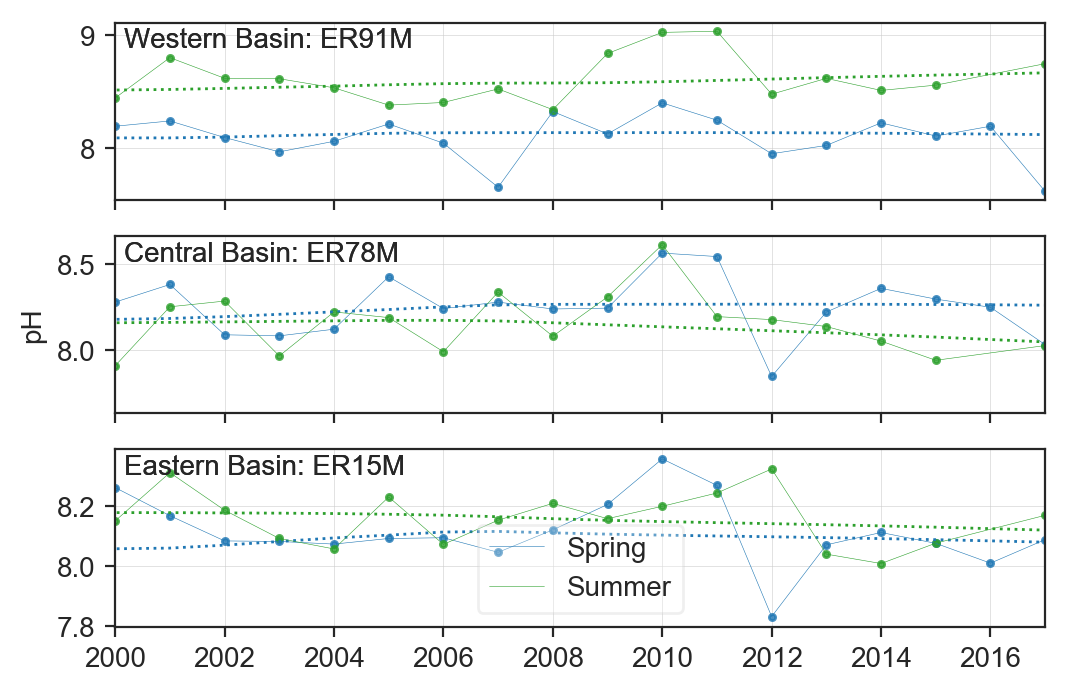

In [9]:
pH = pd.read_csv('../../measurements/GLNPO/Mass Balance/pH.csv')
pH = pH[pH.QC_TYPE=='routine field sample']
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['SEASON'].isin(seasons)]
pH['VALUE_1'] = pd.to_numeric(pH['VALUE_1'], errors='coerce')
pH = pH[pH['VALUE_1']>0.1]
pH = pH.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = pH[(pH['STATION_ID']==st) & (pH['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('pH')
f.savefig('Mass Balance/GLENDA/Trends_pH.pdf')

Text(0,0.5,'Total Phosphorus as P, [$\\mu g$ $L^{-1}$]')

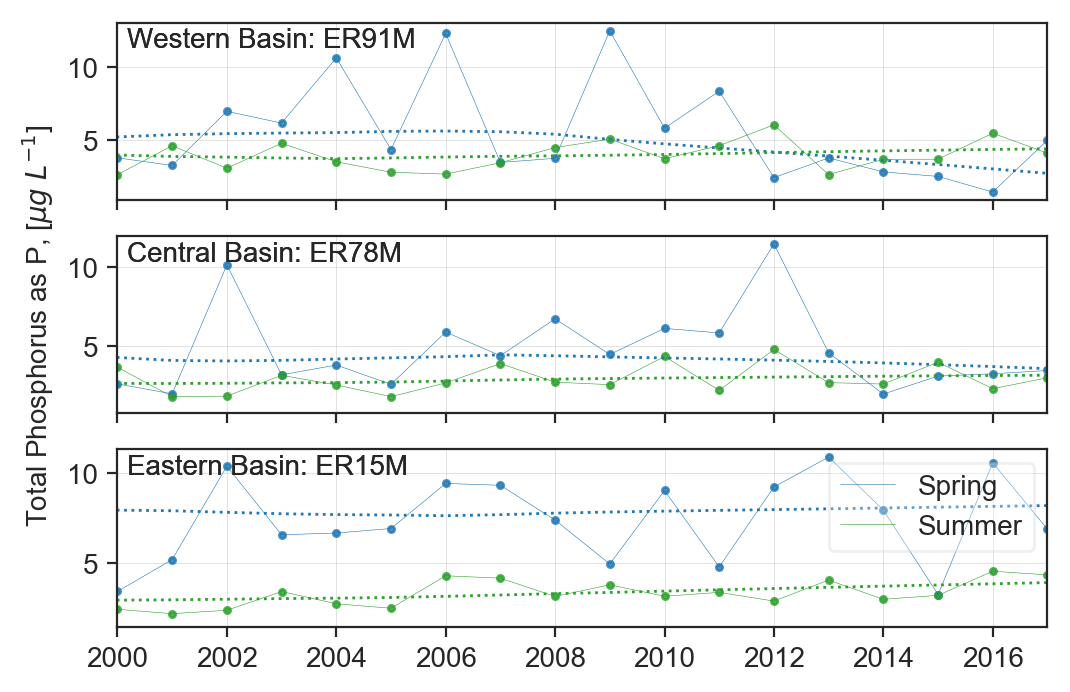

In [10]:
TOTP = pd.read_csv('../../measurements/GLNPO/Mass Balance/TOTP.csv')
TOTP = TOTP[TOTP.QC_TYPE=='routine field sample']
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['SEASON'].isin(seasons)]
TOTP['VALUE_1'] = pd.to_numeric(TOTP['VALUE_1'], errors='coerce')
TOTP = TOTP[TOTP['VALUE_1']>0.1]
TOTP = TOTP.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = TOTP[(TOTP['STATION_ID']==st) & (TOTP['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Total Phosphorus as P, [$\mu g$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_TOTP_ugL.pdf')

Text(0,0.5,'Chl-a, [$\\mu g$ $L^{-1}$]')

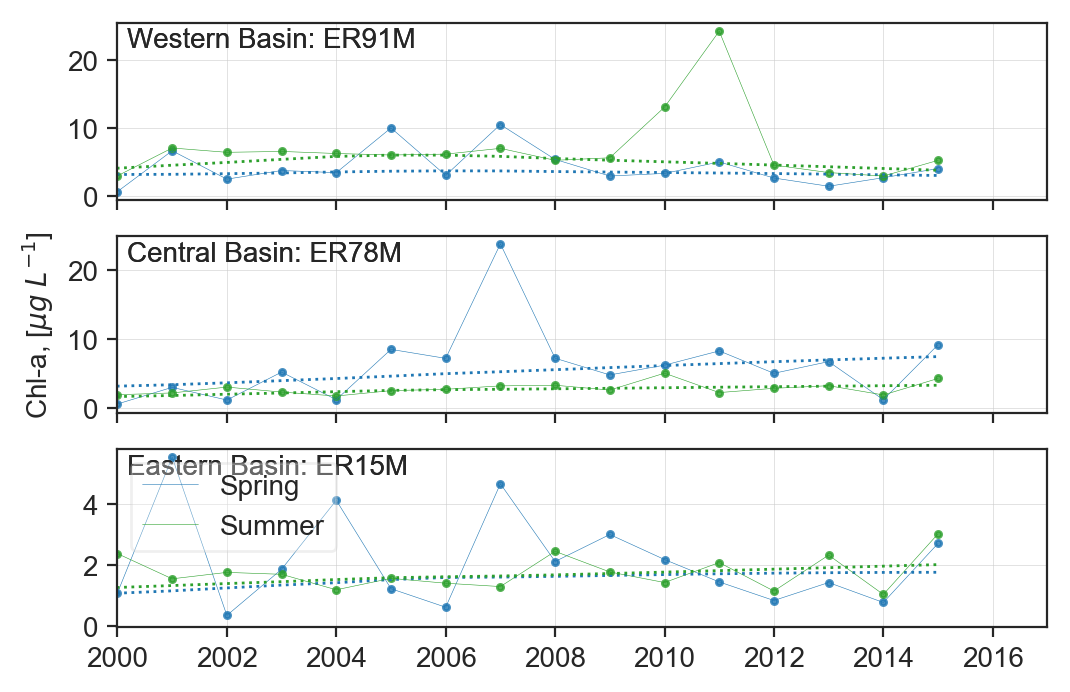

In [11]:
Chla = pd.read_csv('../../measurements/GLNPO/Mass Balance/Chla.csv')
Chla = Chla[Chla.QC_TYPE=='routine field sample']
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['SEASON'].isin(seasons)]
Chla['VALUE_1'] = pd.to_numeric(Chla['VALUE_1'], errors='coerce')
Chla = Chla[Chla['VALUE_1']>0.1]
Chla = Chla.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Chla[(Chla['STATION_ID']==st) & (Chla['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Chl-a, [$\mu g$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Chla_ugL.pdf')

Text(0,0.5,'Nitrogen Total Oxidized, [$m g$ $L^{-1}$]')

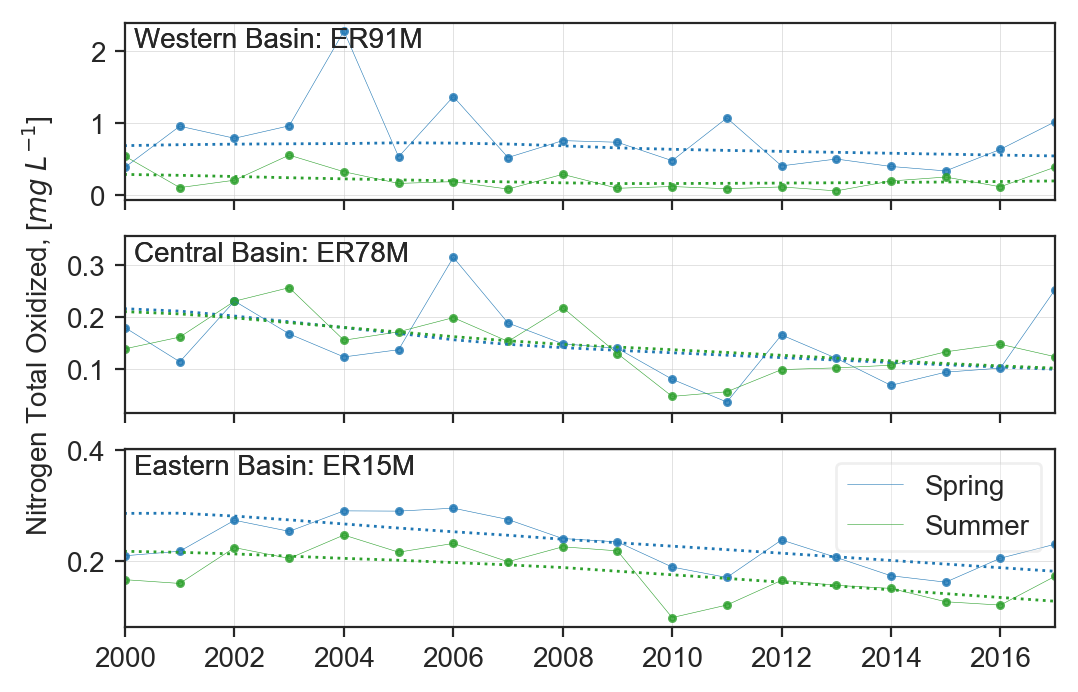

In [12]:
Ntot_oxidized = pd.read_csv('../../measurements/GLNPO/Mass Balance/Ntot_oxidized.csv')
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized.QC_TYPE=='routine field sample']
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['SEASON'].isin(seasons)]
Ntot_oxidized['VALUE_1'] = pd.to_numeric(Ntot_oxidized['VALUE_1'], errors='coerce')
# Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['VALUE_1']>0.1]
Ntot_oxidized = Ntot_oxidized.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Ntot_oxidized[(Ntot_oxidized['STATION_ID']==st) & (Ntot_oxidized['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Nitrogen Total Oxidized, [$m g$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Ntot_oxidized_mgL.pdf')

Text(0,0.5,'Silica, Dissolved as Si, [$mg$ $L^{-1}$]')

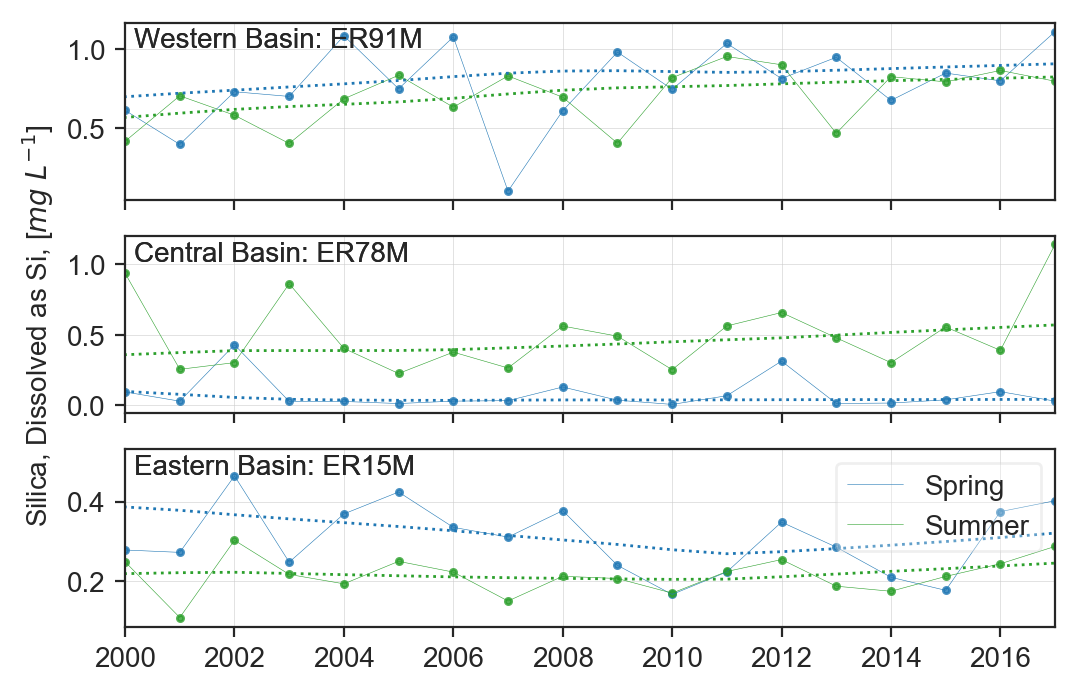

In [13]:
SilicaDissAsSi = pd.read_csv('../../measurements/GLNPO/Mass Balance/SilicaDissAsSi.csv')
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi.QC_TYPE=='routine field sample']
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['SEASON'].isin(seasons)]
SilicaDissAsSi['VALUE_1'] = pd.to_numeric(SilicaDissAsSi['VALUE_1'], errors='coerce')
# SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['VALUE_1']>0.1]
SilicaDissAsSi = SilicaDissAsSi.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = SilicaDissAsSi[(SilicaDissAsSi['STATION_ID']==st) & (SilicaDissAsSi['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Silica, Dissolved as Si, [$mg$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_SilicaDissAsSi_mgL.pdf')

Text(0,0.5,'Turbidity, [$NTU$]')

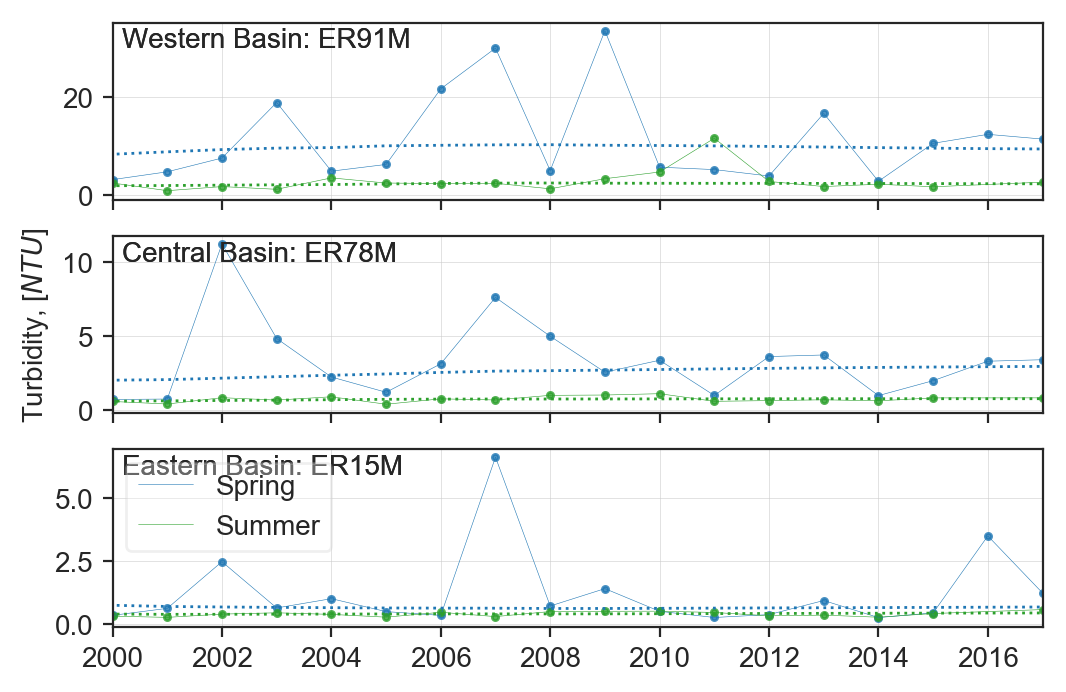

In [14]:
Turbidity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Turbidity.csv')
Turbidity = Turbidity[Turbidity.QC_TYPE=='routine field sample']
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['SEASON'].isin(seasons)]
Turbidity['VALUE_1'] = pd.to_numeric(Turbidity['VALUE_1'], errors='coerce')
# Turbidity = Turbidity[Turbidity['VALUE_1']>0.1]
Turbidity = Turbidity.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Turbidity[(Turbidity['STATION_ID']==st) & (Turbidity['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc='best', framealpha=0.3)
axes[1].set_ylabel('Turbidity, [$NTU$]')
# f.savefig('Mass Balance/GLENDA/Trends_Turbidity_mgL.pdf')

Text(0,0.5,'Conductivity, [$umho$ $cm^{-1}$]')

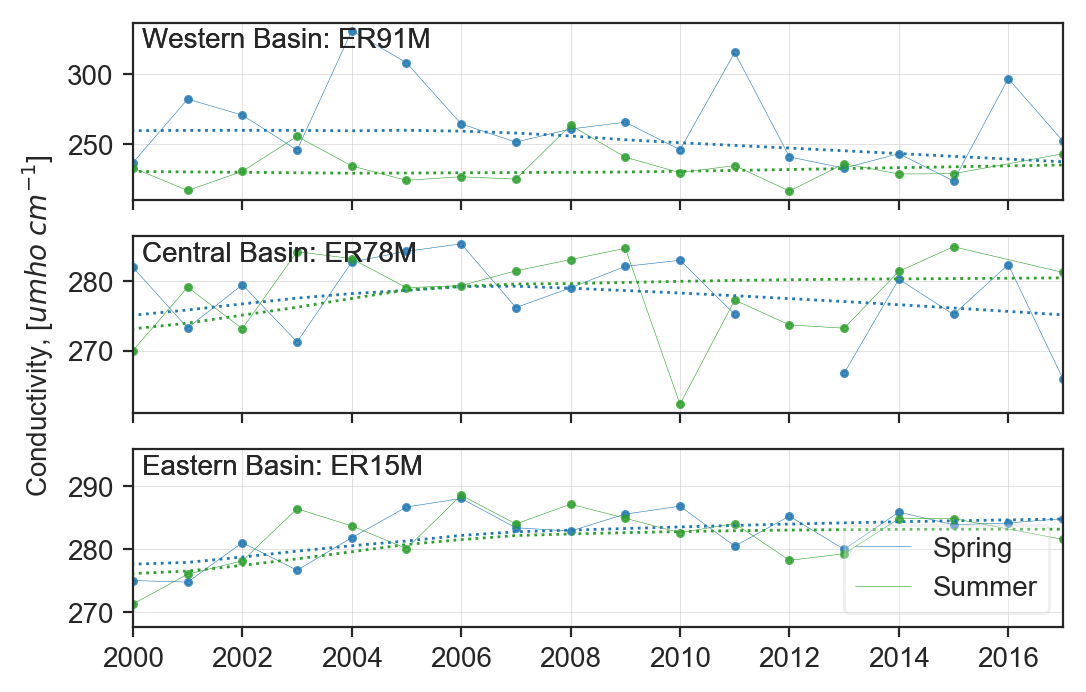

In [15]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
# Conductivity = Conductivity[Conductivity['VALUE_1']>0.1]
Conductivity = Conductivity.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Conductivity[(Conductivity['STATION_ID']==st) & (Conductivity['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Conductivity, [$umho$ $cm^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Conductivity.pdf')

Text(0,0.5,'Conductivity, [$umho$ $cm^{-1}$]')

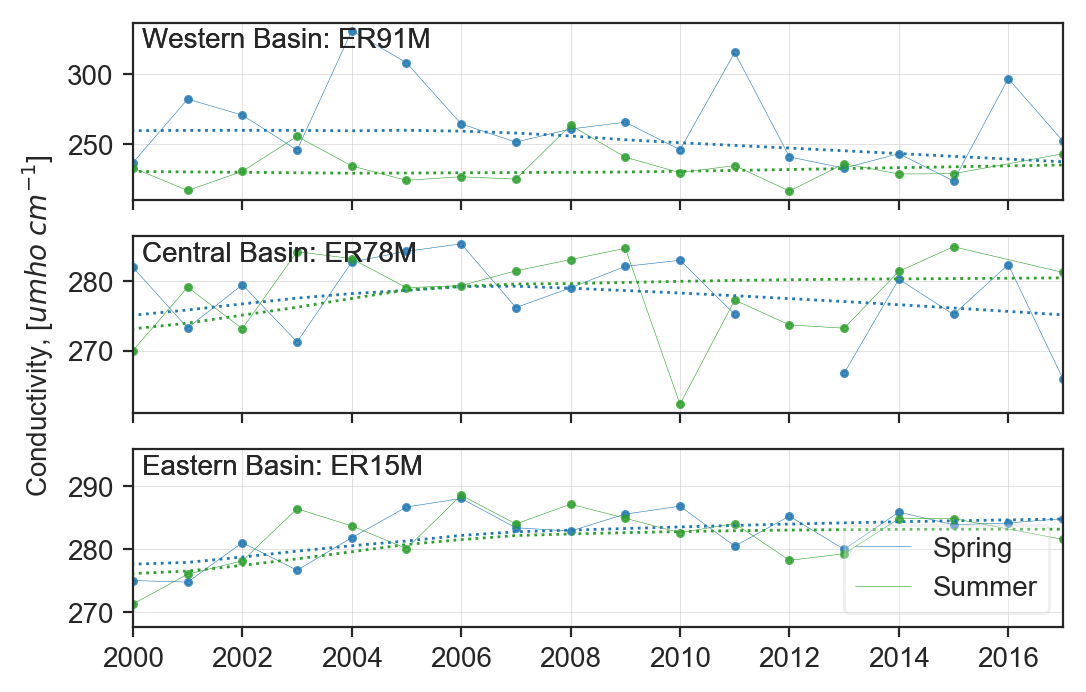

In [16]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
# Conductivity = Conductivity[Conductivity['VALUE_1']>0.1]
Conductivity = Conductivity.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Conductivity[(Conductivity['STATION_ID']==st) & (Conductivity['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Conductivity, [$umho$ $cm^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Conductivity.pdf')

Text(0,0.5,'Hardness, Total as CaCO3, [$mmol$ $L^{-1}$]')

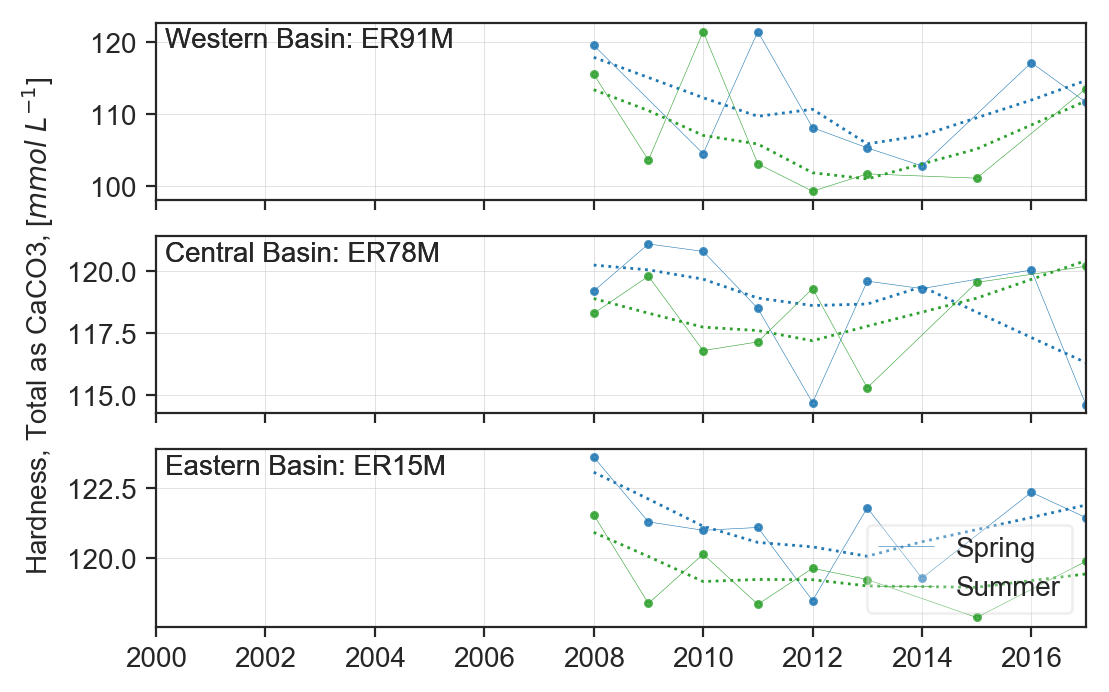

In [17]:
Hardness = pd.read_csv('../../measurements/GLNPO/Mass Balance/Hardness.csv')
Hardness = Hardness[Hardness.QC_TYPE=='routine field sample']
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['SEASON'].isin(seasons)]
Hardness['VALUE_1'] = pd.to_numeric(Hardness['VALUE_1'], errors='coerce')
# Hardness = Hardness[Hardness['VALUE_1']>0.1]
Hardness = Hardness.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=200, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Hardness[(Hardness['STATION_ID']==st) & (Hardness['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
        axes[i].set_xlim(2000,2017)
#         axes[i].set_ylim(7.5,9.2)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Hardness, Total as CaCO3, [$mmol$ $L^{-1}$]')
# f.savefig('Mass Balance/GLENDA/Trends_Hardness.pdf')